# Tests for a custom bed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *

## Linear bed

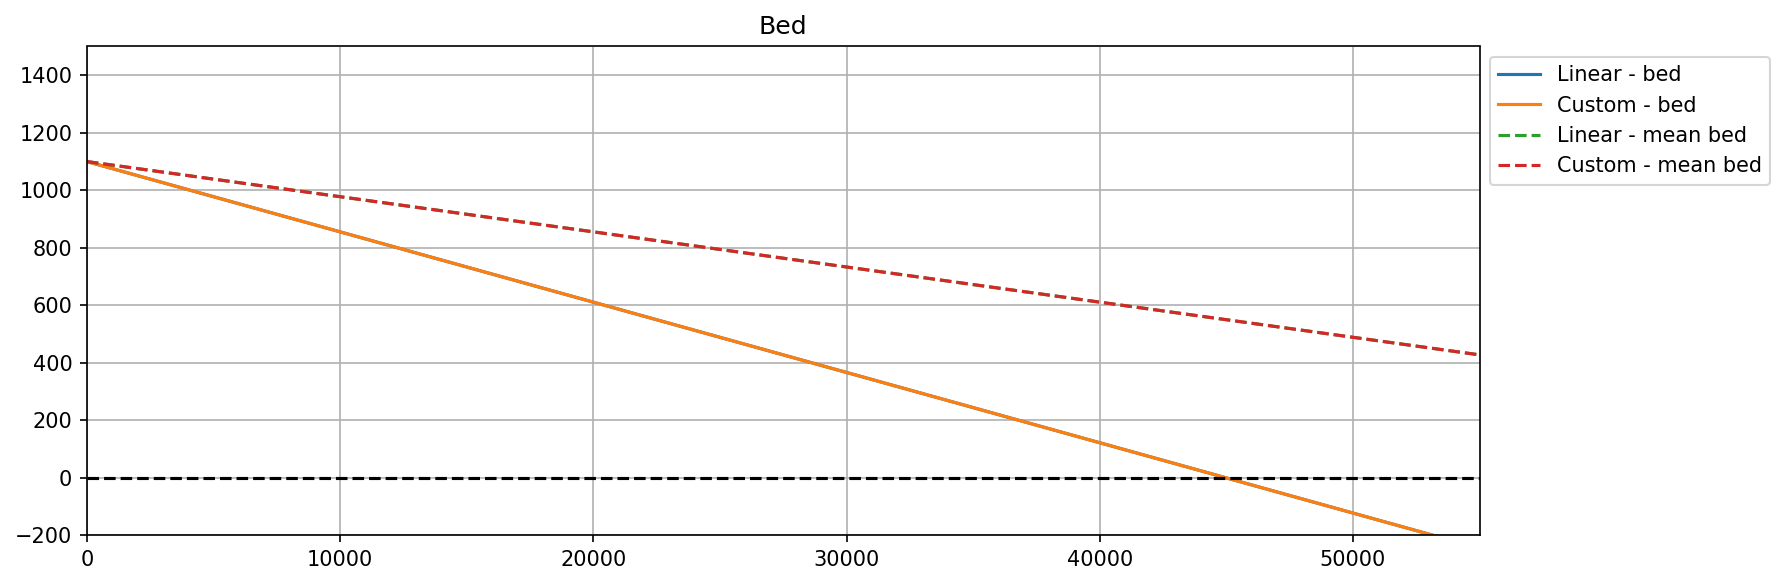

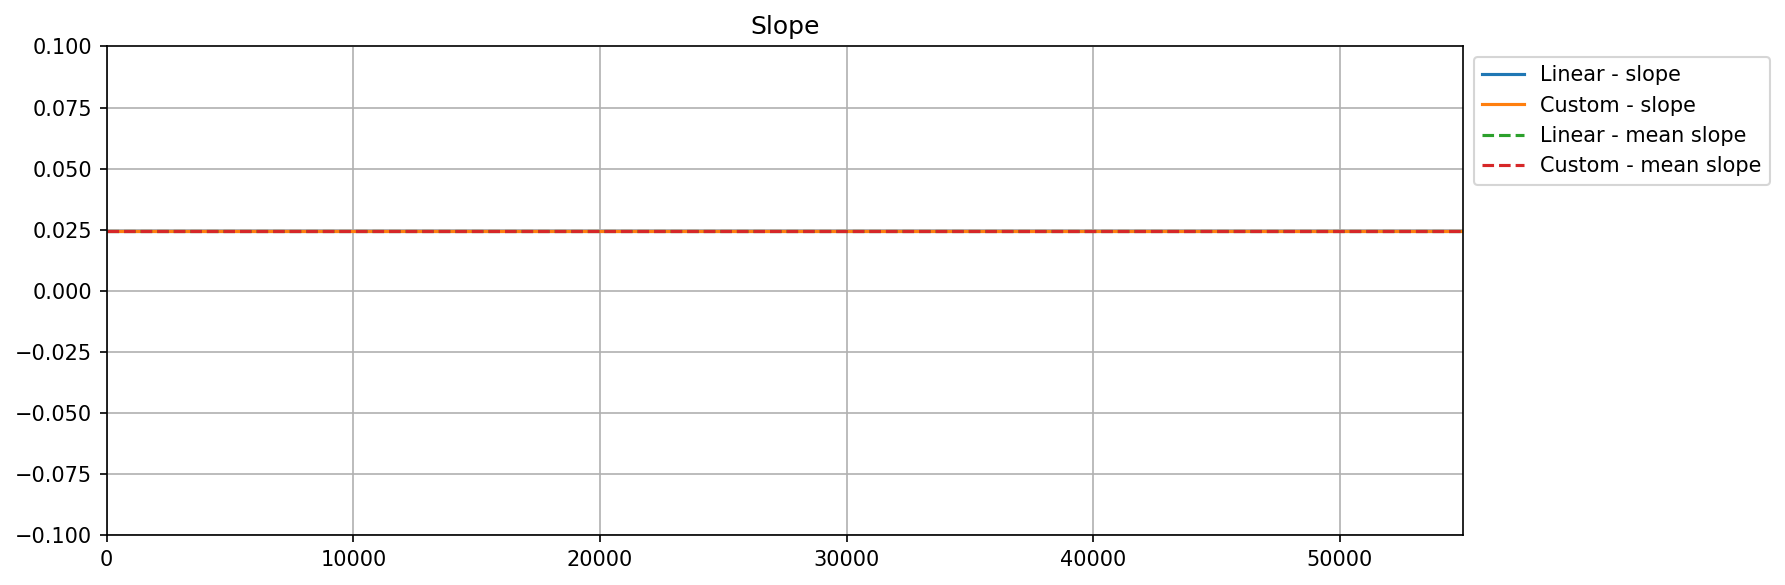

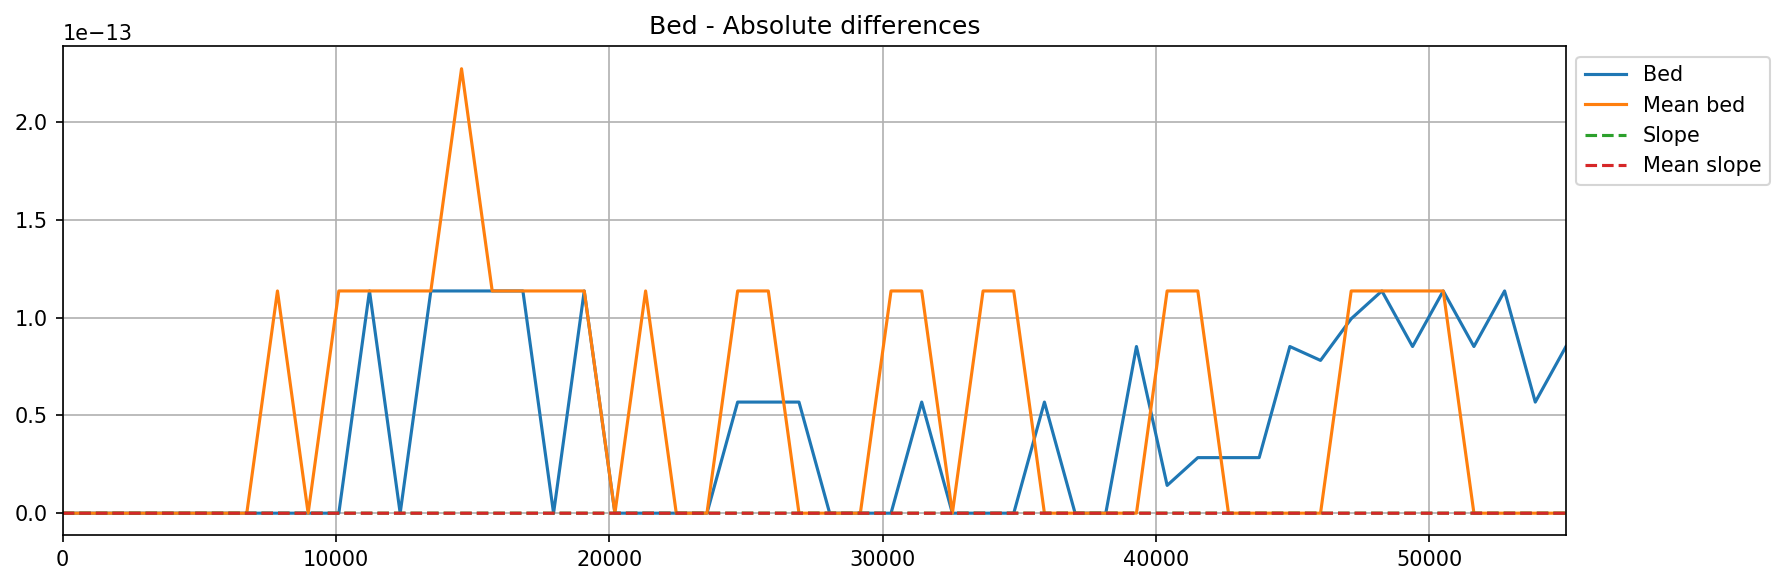

427.7777777777777 427.7777777777777
0.024444444444444446 0.024444444444444442
427.7777777777778 427.7777777777778
0.0 0.0


In [2]:
b0 = 1100.
s = 1100./45000.

x1 = np.linspace(0., 500000., 100)
y1 = b0 - s * x1

A = LinearBedModel(b0=b0, s=s, L0=25000)
B = CustomBedModel(x1, y1, L0=25000)

x = np.linspace(0, 55000)

# absolute
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.bed(xi) for xi in x], "-", label="Linear - bed")
plt.plot(x, [B.bed(xi) for xi in x], "-", label="Custom - bed")
plt.plot(x, [A.mean_bed(xi) for xi in x], "--", label="Linear - mean bed")
plt.plot(x, [B.mean_bed(xi) for xi in x], "--", label="Custom - mean bed")
plt.plot(x, [0]*len(x), "--k")

plt.title("Bed")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-200, 1500])
plt.tight_layout()
plt.show()

# slope
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.slope(xi) for xi in x], "-", label="Linear - slope")
plt.plot(x, [B.slope(xi) for xi in x], "-", label="Custom - slope")
plt.plot(x, [A.mean_slope(xi) for xi in x], "--", label="Linear - mean slope")
plt.plot(x, [B.mean_slope(xi) for xi in x], "--", label="Custom - mean slope")

plt.title("Slope")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-.1, .1])
plt.tight_layout()
plt.show()

# differences
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, np.abs([A.bed(xi) - B.bed(xi) for xi in x]), label="Bed")
plt.plot(x, np.abs([A.mean_bed(xi) - B.mean_bed(xi) for xi in x]), label="Mean bed")
plt.plot(x, np.abs([A.slope(xi) - B.slope(xi) for xi in x]), "--", label="Slope")
plt.plot(x, np.abs([A.mean_slope(xi) - B.mean_slope(xi) for xi in x]), "--", label="Mean slope")

plt.title("Bed - Absolute differences")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
# plt.ylim([-2, 500])
plt.tight_layout()
plt.show()

glaciers = [A,B]

print(A.mean_bed(np.max(x)), B.mean_bed(np.max(x)))
print(A.mean_slope(np.max(x)/2), B.mean_slope(np.max(x)/2))
print(np.mean(A.bed(x)), np.mean(B.bed(x)))
print(A.d_slope_d_L(np.max(x)/2), B.d_slope_d_L(np.max(x)/2))

In [3]:
t = 500.
dt = 0.2

for glacier in glaciers:
    print(glacier)
    glacier.E = 800
    glacier.integrate(dt, t)
    glacier.E = 700
    glacier.integrate(dt, t)
    glacier.E = 800
    glacier.integrate(dt, t)

Minimum Glacier Model for a linear bed.
Minimum Glacier Model for a custom bed.


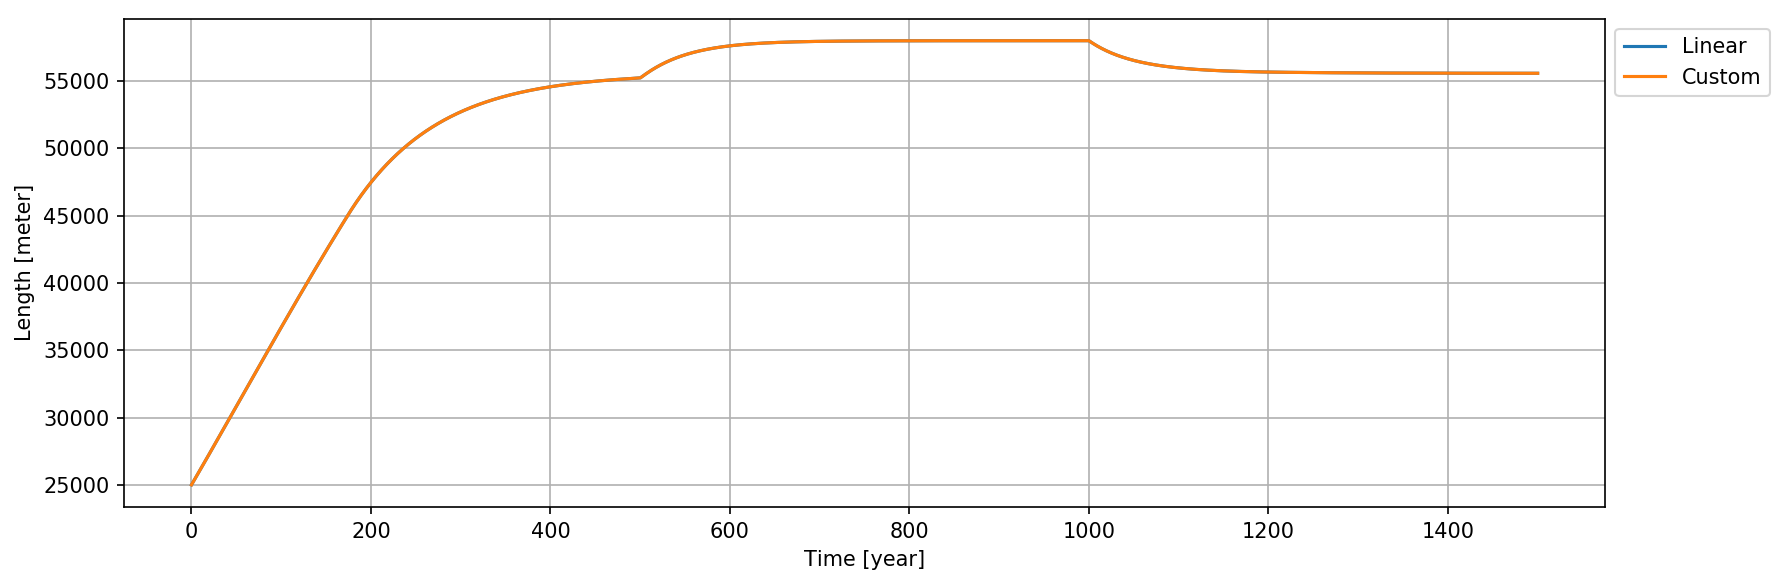

In [4]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(A.t, A.L, label="Linear")
plt.plot(B.t, B.L, label="Custom")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

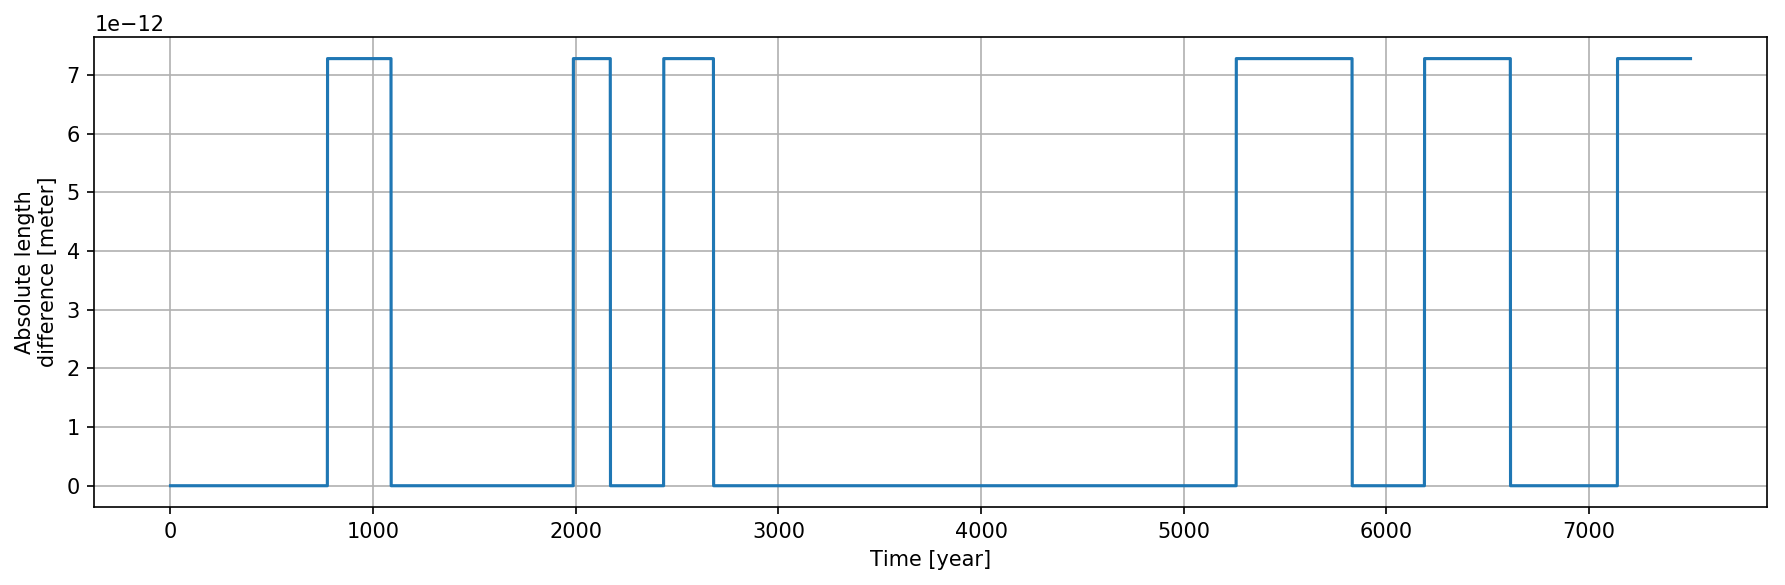

In [5]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(np.abs(A.L - B.L))

plt.grid()
plt.xlabel("Time [year]")
plt.ylabel("Absolute length\ndifference [meter]")
plt.tight_layout()
plt.show()

## Concave bed

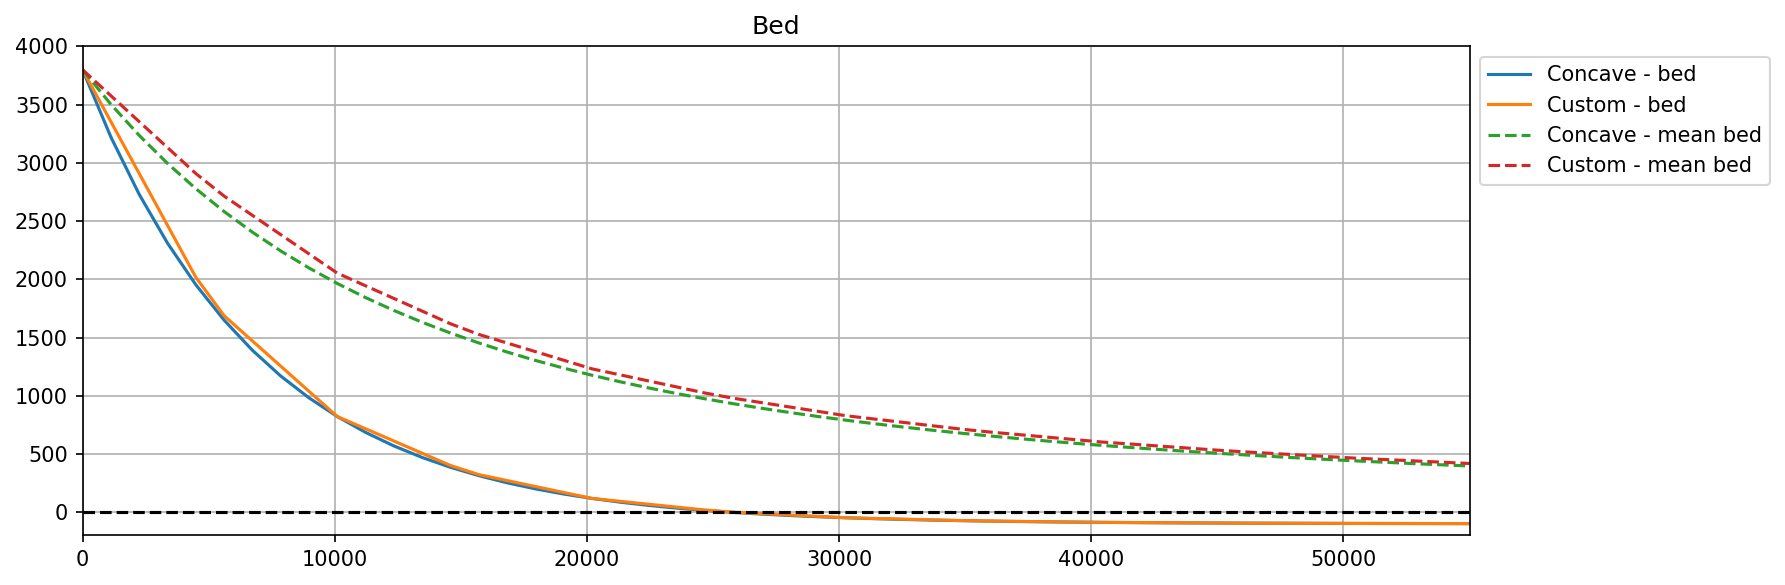

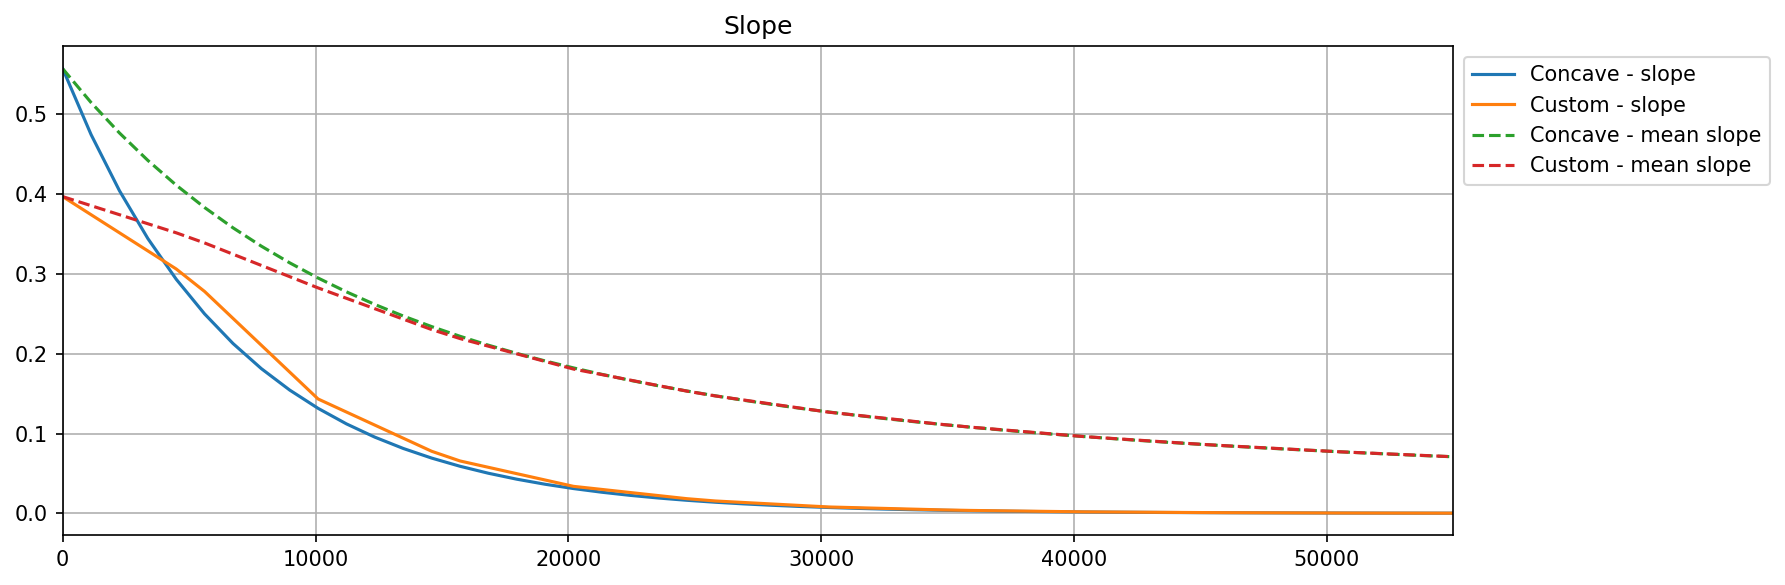

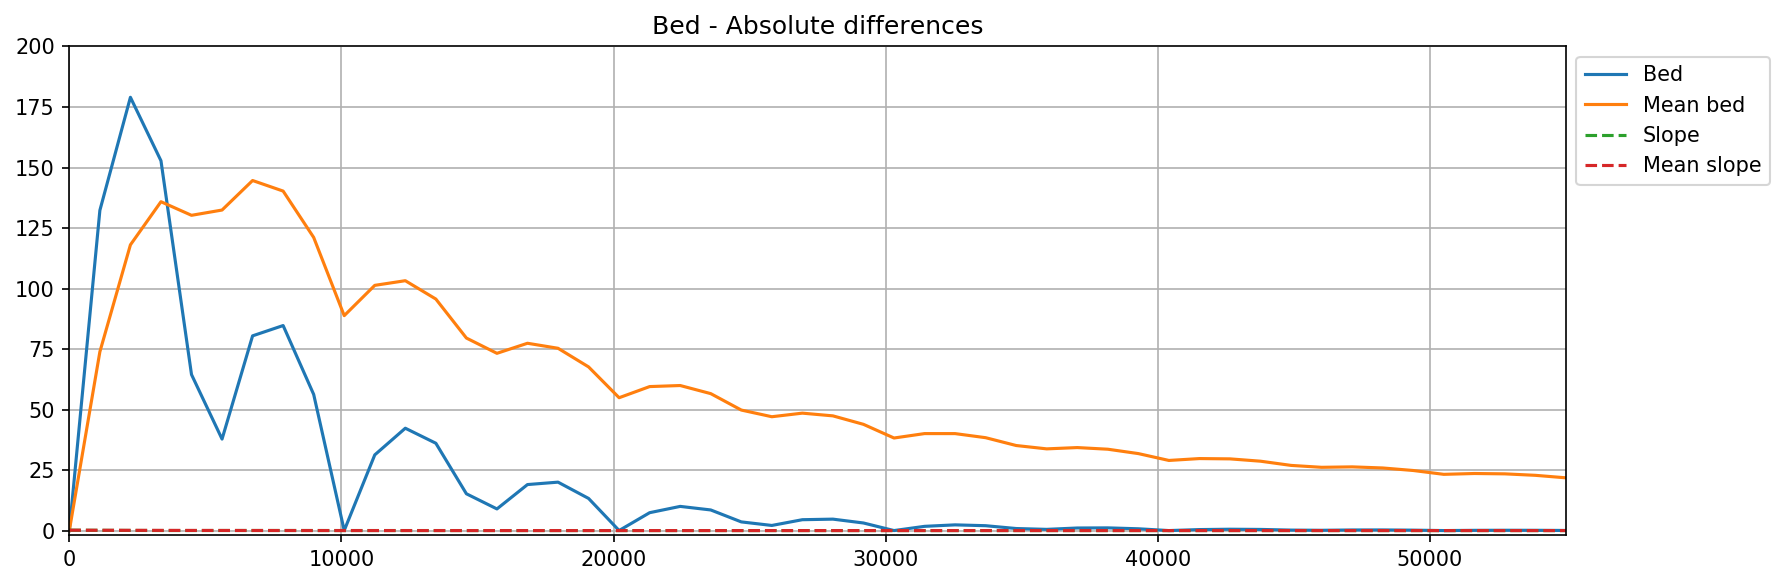

396.1715545838404 417.9635947143349
0.13902836929139992 0.13948785551132659
426.3046401429209 446.927531354908
-4.657032418458685e-06 -4.536060909100803e-06


In [6]:
b0=3900.
ba=-100.
xl=7000.

x1 = np.linspace(0., 500000., 100)
y1 = ba + b0 * np.exp(-x1/xl)

A = ConcaveBedModel(b0=b0, ba=ba, xl=xl, L0=25000)
B = CustomBedModel(x1, y1, L0=25000)

x = np.linspace(0, 55000)

# absolute
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.bed(xi) for xi in x], "-", label="Concave - bed")
plt.plot(x, [B.bed(xi) for xi in x], "-", label="Custom - bed")
plt.plot(x, [A.mean_bed(xi) for xi in x], "--", label="Concave - mean bed")
plt.plot(x, [B.mean_bed(xi) for xi in x], "--", label="Custom - mean bed")
plt.plot(x, [0]*len(x), "--k")

plt.title("Bed")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-200, 4000])
plt.tight_layout()
plt.show()

# slope
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.slope(xi) for xi in x], "-", label="Concave - slope")
plt.plot(x, [B.slope(xi) for xi in x], "-", label="Custom - slope")
plt.plot(x, [A.mean_slope(xi) for xi in x], "--", label="Concave - mean slope")
plt.plot(x, [B.mean_slope(xi) for xi in x], "--", label="Custom - mean slope")

plt.title("Slope")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
# plt.ylim([-.1, .1])
plt.tight_layout()
plt.show()

# differences
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, np.abs([A.bed(xi) - B.bed(xi) for xi in x]), label="Bed")
plt.plot(x, np.abs([A.mean_bed(xi) - B.mean_bed(xi) for xi in x]), label="Mean bed")
plt.plot(x, np.abs([A.slope(xi) - B.slope(xi) for xi in x]), "--", label="Slope")
plt.plot(x, np.abs([A.mean_slope(xi) - B.mean_slope(xi) for xi in x]), "--", label="Mean slope")

plt.title("Bed - Absolute differences")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-2, 200])
plt.tight_layout()
plt.show()

glaciers = [A,B]

print(A.mean_bed(np.max(x)), B.mean_bed(np.max(x)))
print(A.mean_slope(np.max(x)/2), B.mean_slope(np.max(x)/2))
print(np.mean(A.bed(x)), np.mean(B.bed(x)))
print(A.d_slope_d_L(np.max(x)/2), B.d_slope_d_L(np.max(x)/2))

In [7]:
t = 500.
dt = 0.2

for glacier in glaciers:
    print(glacier)
    glacier.E = 800
    glacier.integrate(dt, t)
    glacier.E = 700
    glacier.integrate(dt, t)
    glacier.E = 800
    glacier.integrate(dt, t)

Minimum Glacier Model for a concave bed.
Minimum Glacier Model for a custom bed.


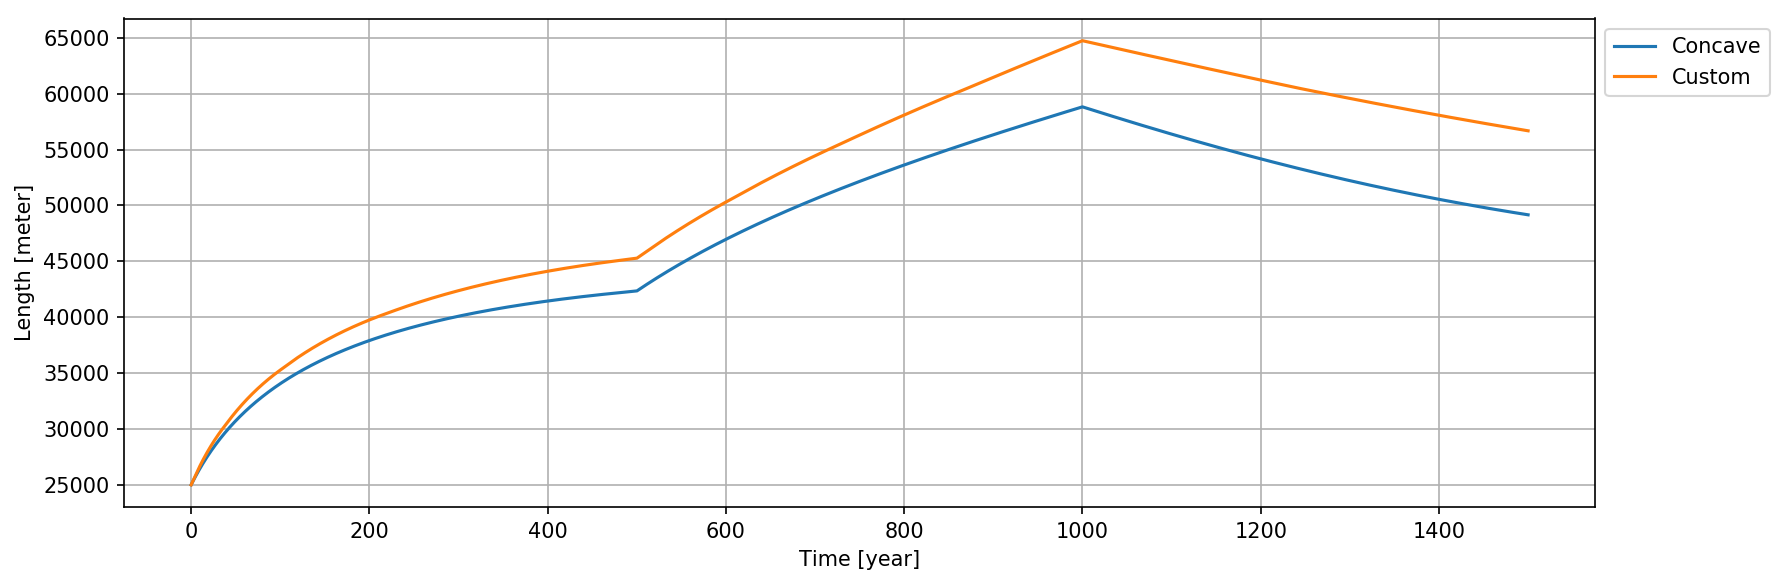

In [8]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(A.t, A.L, label="Concave")
plt.plot(B.t, B.L, label="Custom")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

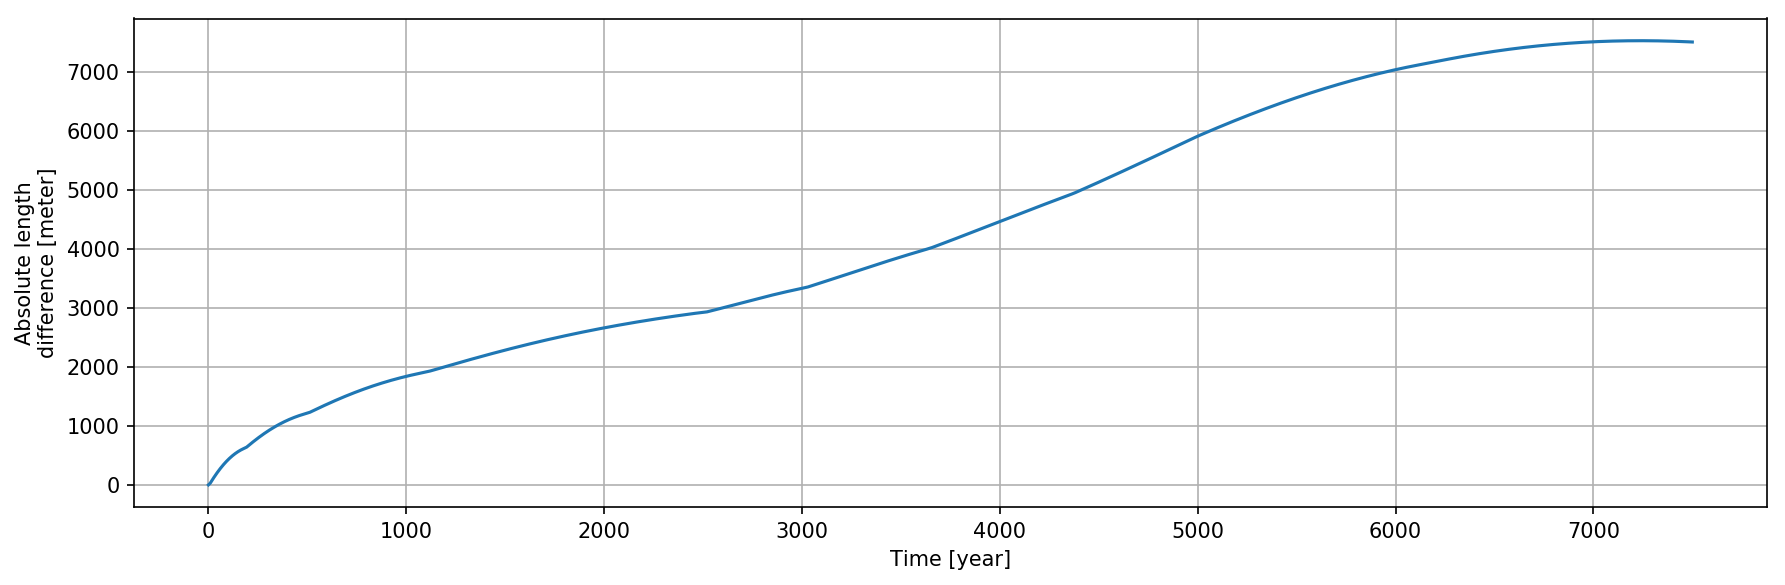

In [9]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(np.abs(A.L - B.L))

plt.grid()
plt.xlabel("Time [year]")
plt.ylabel("Absolute length\ndifference [meter]")
plt.tight_layout()
plt.show()

## Custom bed

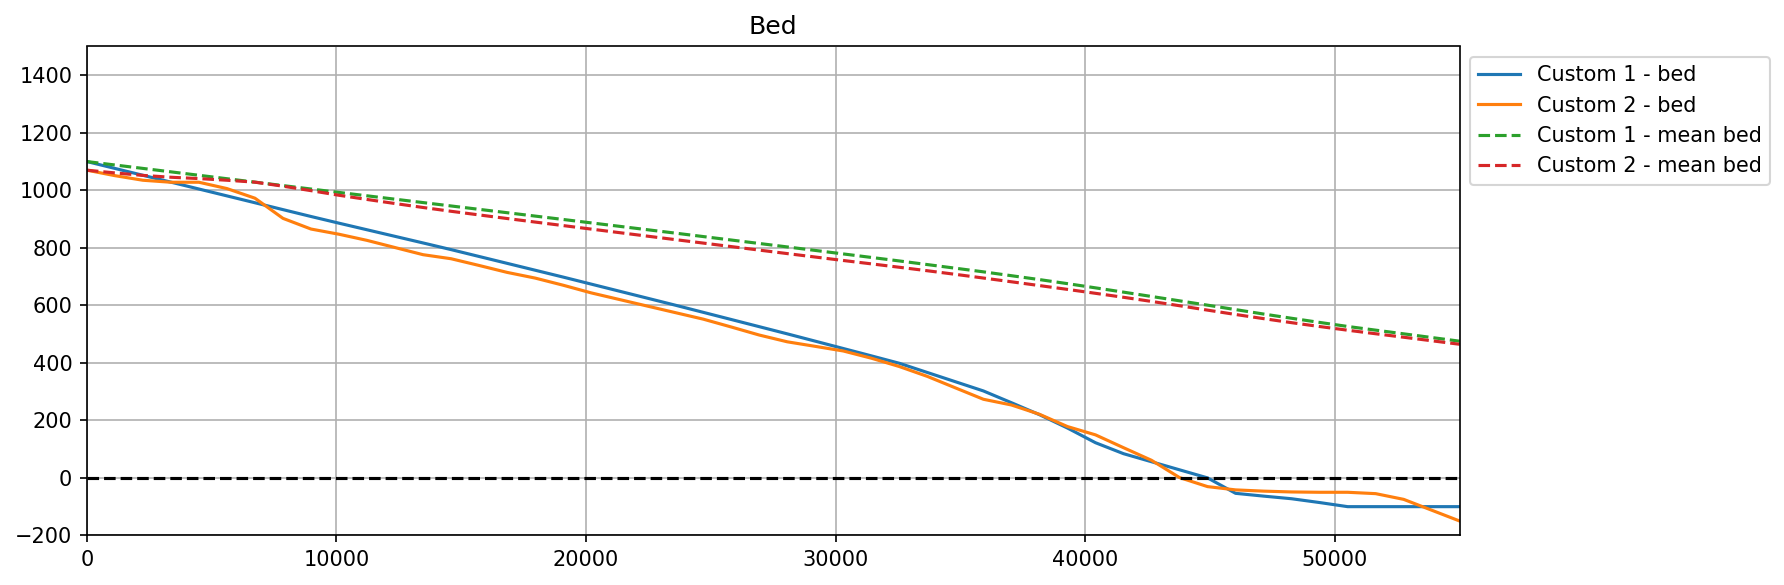

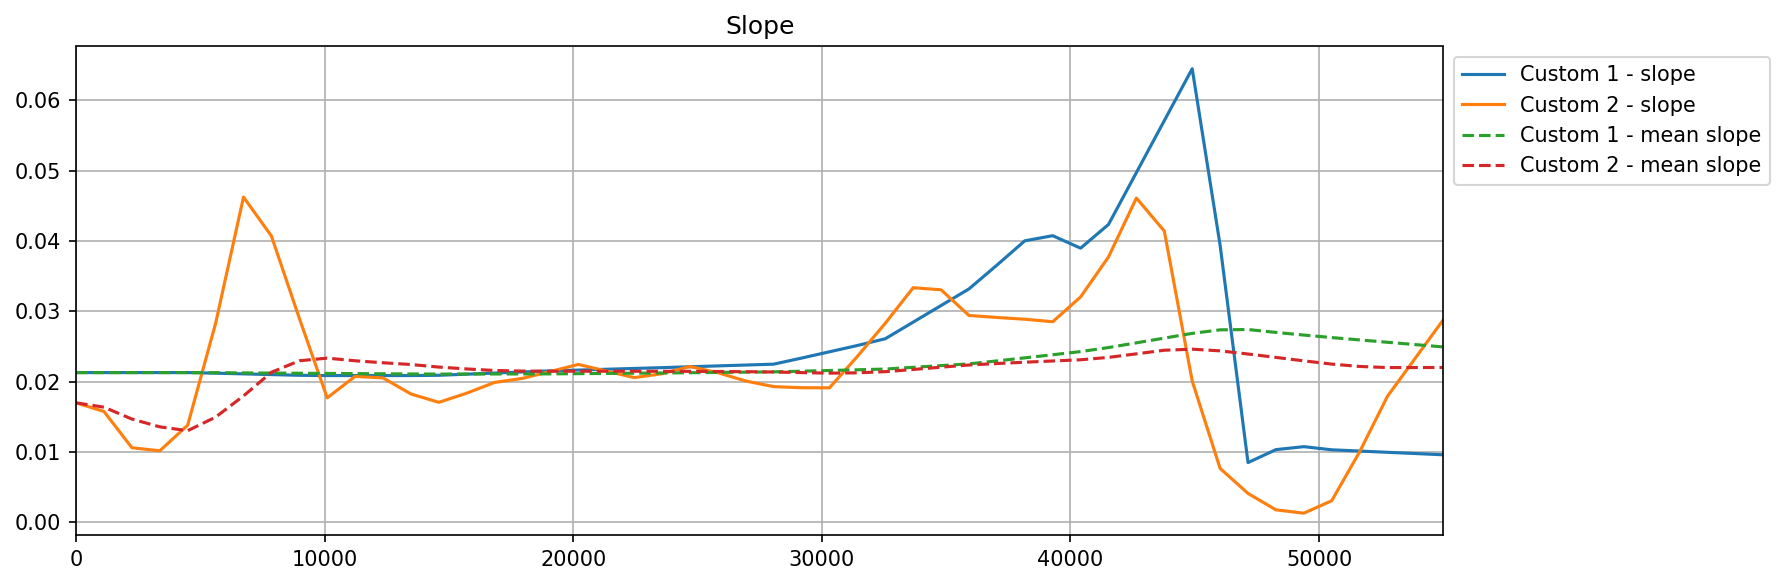

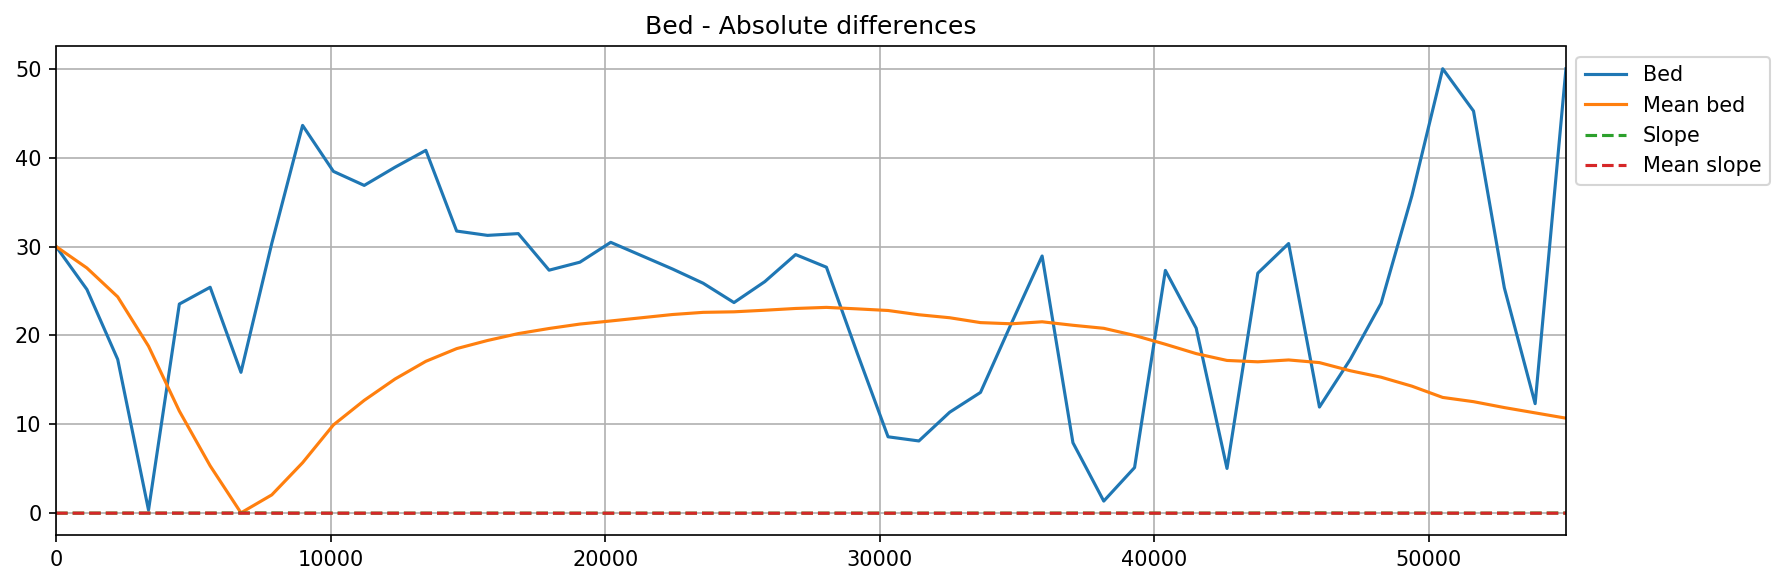

475.3081818181818 464.61863390909093
0.0213590180315748 0.021390804611874464
475.98782010688535 464.4854674574442
3.600990605302085e-08 -2.3370684064036306e-08


In [10]:
[y1,x1] = np.genfromtxt("bed_data_01.txt", delimiter=", ")
[y2,x2] = np.genfromtxt("bed_data_02.txt", delimiter=", ")

x1 = np.concatenate((x1, [55000, 60000, 65000, 950000]))
y1 = np.concatenate((y1, [-100., -200, -300, -300]))
x2 = np.concatenate((x2, [55000, 60000, 65000, 950000]))
y2 = np.concatenate((y2, [-100., -200, -300, -300])) - 50

A = CustomBedModel(x1, y1, kappa=1/2)
B = CustomBedModel(x2, y2, kappa=1/2)

x = np.linspace(0, 55000)

# absolute
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.bed(xi) for xi in x], "-", label="Custom 1 - bed")
plt.plot(x, [B.bed(xi) for xi in x], "-", label="Custom 2 - bed")
plt.plot(x, [A.mean_bed(xi) for xi in x], "--", label="Custom 1 - mean bed")
plt.plot(x, [B.mean_bed(xi) for xi in x], "--", label="Custom 2 - mean bed")
plt.plot(x, [0]*len(x), "--k")

plt.title("Bed")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-200, 1500])
plt.tight_layout()
plt.show()

# slope
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, [A.slope(xi) for xi in x], "-", label="Custom 1 - slope")
plt.plot(x, [B.slope(xi) for xi in x], "-", label="Custom 2 - slope")
plt.plot(x, [A.mean_slope(xi) for xi in x], "--", label="Custom 1 - mean slope")
plt.plot(x, [B.mean_slope(xi) for xi in x], "--", label="Custom 2 - mean slope")

plt.title("Slope")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.tight_layout()
plt.show()

# differences
plt.figure(figsize=(12,4), dpi=150)
plt.plot(x, np.abs([A.bed(xi) - B.bed(xi) for xi in x]), label="Bed")
plt.plot(x, np.abs([A.mean_bed(xi) - B.mean_bed(xi) for xi in x]), label="Mean bed")
plt.plot(x, np.abs([A.slope(xi) - B.slope(xi) for xi in x]), "--", label="Slope")
plt.plot(x, np.abs([A.mean_slope(xi) - B.mean_slope(xi) for xi in x]), "--", label="Mean slope")

plt.title("Bed - Absolute differences")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.tight_layout()
plt.show()

glaciers = [A,B]

print(A.mean_bed(np.max(x)), B.mean_bed(np.max(x)))
print(A.mean_slope(np.max(x)/2), B.mean_slope(np.max(x)/2))
print(np.mean(A.bed(x)), np.mean(B.bed(x)))
print(A.d_slope_d_L(np.max(x)/2), B.d_slope_d_L(np.max(x)/2))

In [11]:
t = 500.
dt = 0.2

for glacier in glaciers:
    print(glacier)
    glacier.E = 800
    glacier.integrate(dt, 2*t)
    glacier.E = 1000
    glacier.integrate(dt, t)
    glacier.E = 800
    glacier.integrate(dt, t)

Minimum Glacier Model for a custom bed.
Minimum Glacier Model for a custom bed.


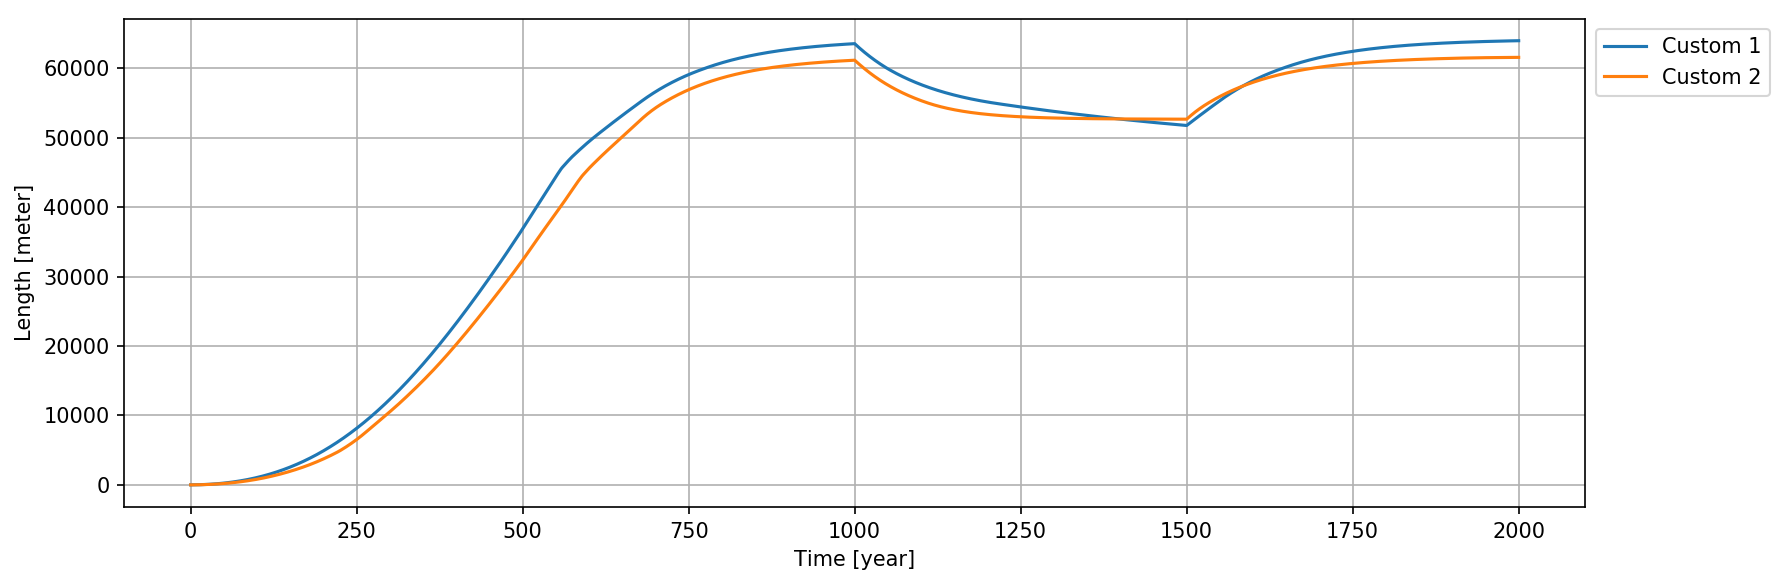

In [12]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(A.t, A.L, label="Custom 1")
plt.plot(B.t, B.L, label="Custom 2")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

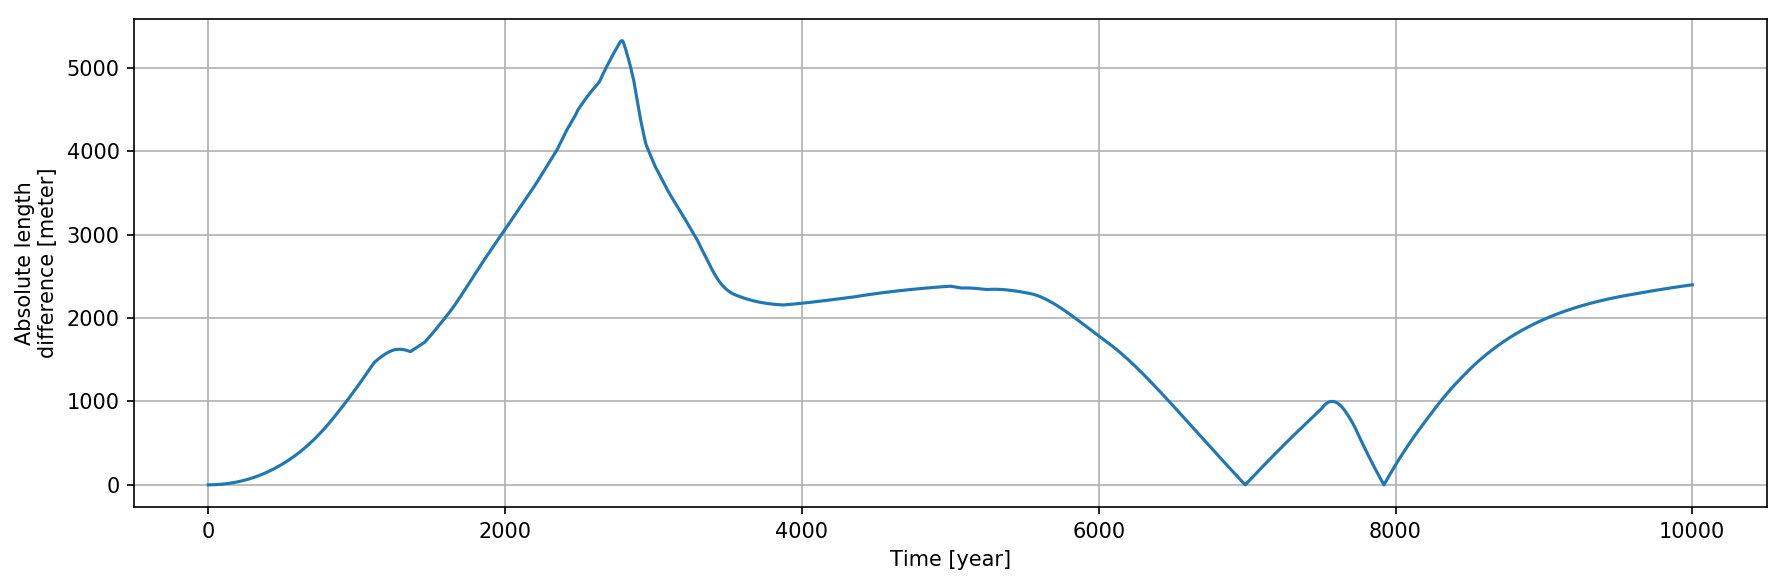

In [13]:
plt.figure(figsize=(12,4), dpi=150)   

plt.plot(np.abs(A.L - B.L))

plt.grid()
plt.xlabel("Time [year]")
plt.ylabel("Absolute length\ndifference [meter]")
plt.tight_layout()
plt.show()